In [18]:
import pandas as pd
data = pd.read_csv('dataset.csv')
print(data.head())


   feature_1  feature_2  feature_3  feature_4  isVirus
0  -0.233467   0.308799   2.484015   1.732721    False
1   1.519003   1.238482   3.344450   0.783744    False
2   0.400640   1.916748   3.291096  -0.918519    False
3  -1.616474   0.209703   1.461544  -0.291837    False
4   1.480515   5.299829   2.640670   1.867559     True


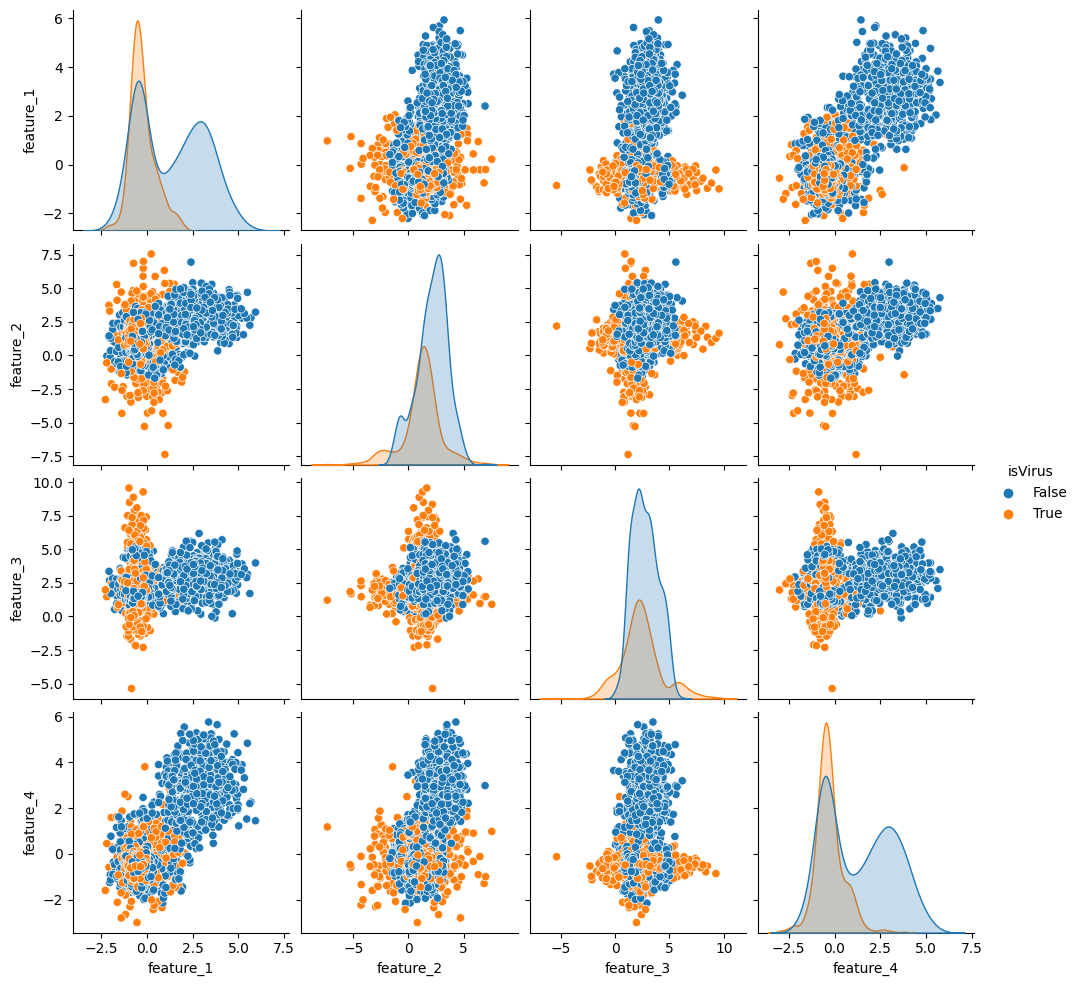

In [19]:
import seaborn as sns

# create a pair plot
sns.pairplot(data, hue='isVirus')

# show the plot
plt.show()


In [23]:
import numpy as np

# Check the class balance of the target variable "isVirus"
print(data['isVirus'].value_counts())

# Check for missing values and impute them using the median
data = data.fillna(data.median());

False    1332
True      667
Name: isVirus, dtype: int64


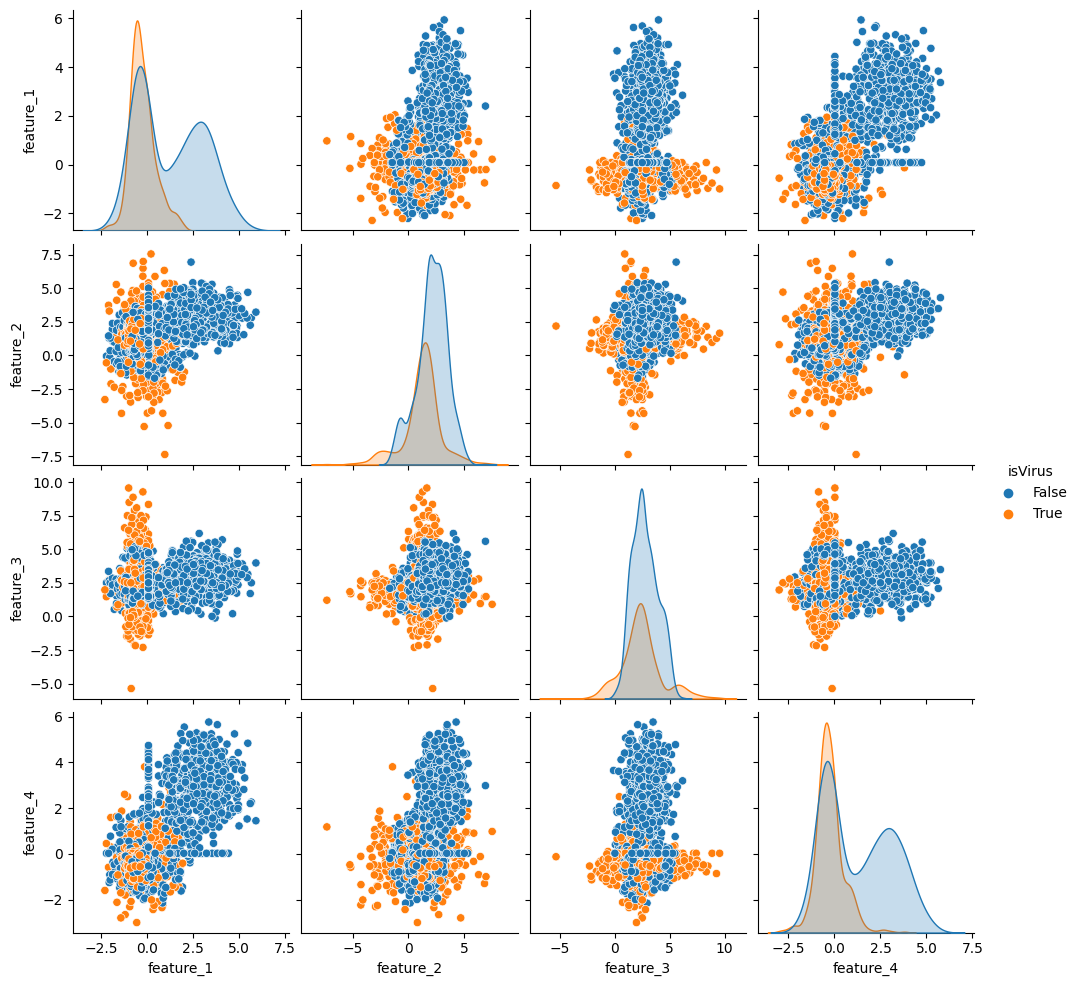

In [24]:
# create a pair plot
sns.pairplot(data, hue='isVirus')

# show the plot
plt.show()


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X = data[['feature_1', 'feature_2', 'feature_3', 'feature_4']]
y = data['isVirus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a decision tree classifier on the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.86


Accuracy: 0.89


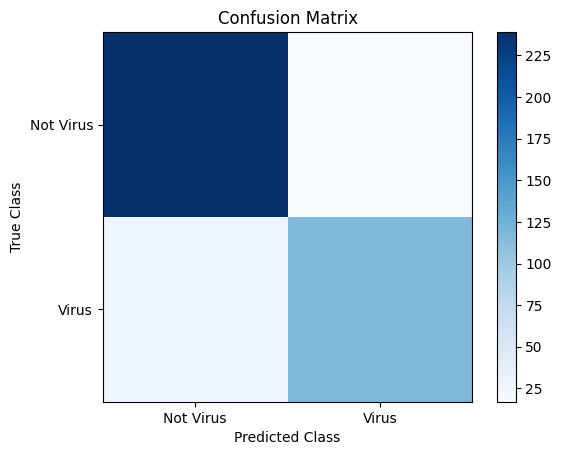

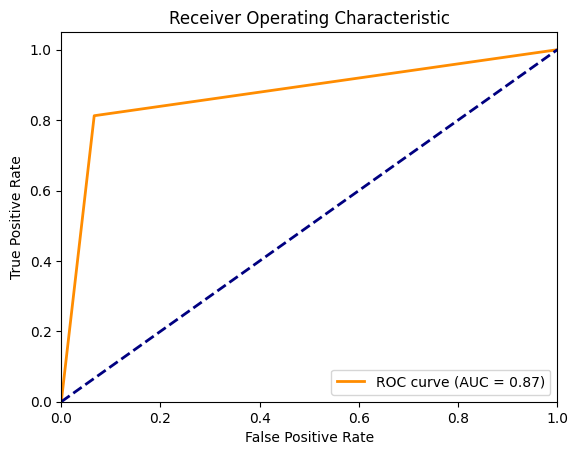

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X = data[['feature_1', 'feature_2', 'feature_3', 'feature_4']]
y = data['isVirus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Train a random forest classifier on the training data
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0,1], ['Not Virus', 'Virus'])
plt.yticks([0,1], ['Not Virus', 'Virus'])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Compute the ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()